In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import hamming_loss
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hinge_loss
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [2]:
dataset = pd.read_csv('emails.csv', encoding = 'latin-1')
dataset.drop_duplicates(inplace = True)
dataset['text']=dataset['text'].map(lambda text: text[8:])
dataset.rename(columns={'spam':'Category','text':'Message'},inplace=True)
dataset.head()


,Message,Category
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [42]:
spam_count = pd.DataFrame()
spam_count['count']=dataset['Category'].value_counts()

spam_dataset = dataset[dataset['Category']== 1]
legit_dataset = dataset[dataset['Category']==0]
dataset['Message'][0]

" naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing 

In [4]:
stop_words = set(stopwords.words('english'))
def wordCount(text):
    try:
        text = text.lower()
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        txt = regex.sub(' ',text)  #remove punctuation
        words = [w for w in txt.split(' ')\
                if not w in stop_words and len(w)>3] # remove stop words and words with length smaller than 3 letters
        return len(words)
    except:
        return 0


In [5]:
def tokenize(text):
    exclude = set(string.punctuation)
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [6]:
spam_dataset = dataset[dataset['Category']== 1]
legit_dataset = dataset[dataset['Category']==0]

In [7]:
spam_dataset['len'] = spam_dataset['Message'].apply(lambda x: len([w for w in x.split(' ')]))
legit_dataset['len'] = legit_dataset['Message'].apply(lambda x: len([w for w in x.split(' ')]))
spam_dataset['processed_len'] = spam_dataset['Message'].apply(lambda x: wordCount(x))
legit_dataset['processed_len'] = legit_dataset['Message'].apply(lambda x: wordCount(x))

C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [8]:
spam_dataset['tokens'] = spam_dataset['Message'].map(tokenize)
legit_dataset['tokens'] = legit_dataset['Message'].map(tokenize)

C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
spam_dataset['tokens']

0       [naturally, irresistible, corporate, identity,...
1       [stock, trading, gunslinger, fanny, merrill, m...
2       [unbelievable, new, homes, made, easy, wanting...
3       [color, printing, special, request, additional...
4       [money, get, software, cds, software, compatib...
5       [great, nnews, hello, welcome, medzonline, gro...
6       [hot, play, motion, homeland, security, invest...
7       [save, money, buy, getting, thing, tried, cial...
8       [undeliverable, home, based, business, grownup...
9       [save, money, buy, getting, thing, tried, cial...
10      [las, vegas, high, rise, boom, las, vegas, fas...
11      [save, money, buy, getting, thing, tried, cial...
12      [brighten, teeth, get, teeth, bright, white, c...
13      [wall, street, phenomenon, reaps, rewards, sma...
14      [fpa, notice, ebay, misrepresentation, identit...
15      [search, engine, position, first, listing, top...
16      [software, guaranteed, legal, name, brand, sof...
17      [local

In [10]:
spam_words = []
for token in spam_dataset['tokens']:
    spam_words = spam_words + token #combine text in different columns in one list
ham_words = []
for token in legit_dataset['tokens']:
    ham_words += token

In [11]:
spam_count = Counter(spam_words).most_common(10)
ham_count = Counter(ham_words).most_common(10)

In [12]:
spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])

In [13]:
dataset['tokens'] = dataset['Message'].map(tokenize)

In [14]:
def text_join(text):
    return " ".join(text)
dataset['text'] = dataset['tokens'].apply(text_join)

In [32]:
tv = TfidfVectorizer('english',max_features=100)
features = tv.fit_transform(dataset['text'])
target = dataset.Category

In [33]:
feature_names = tv.get_feature_names()
pd.DataFrame(features.toarray(),columns = feature_names)

,also,attached,available,best,business,call,com,communications,company,conference,...,use,vince,visit,want,week,well,work,would,www,year
0,0.000000,0.000000,0.000000,0.000000,0.328087,0.000000,0.000000,0.000000,0.556129,0.000000,...,0.179777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.460181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153580,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.738495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.044407,0.000000,0.000000,0.000000,0.098055,0.000000,0.000000,0.000000,0.664840,0.000000,...,0.107459,0.000000,0.000000,0.000000,0.000000,0.052510,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.661486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.603261,0.000000,0.225878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.661486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
features_resampled, target_resampled = ros.fit_resample(features, target)
scoring = {'accuracy':make_scorer(accuracy_score),'f1_score':make_scorer(f1_score),'precision_score':make_scorer(precision_score),'recall_score':make_scorer(recall_score),'roc_auc_score':make_scorer(roc_auc_score),'matthews_corrcoef':make_scorer(matthews_corrcoef),'hinge_loss':make_scorer(hinge_loss)}
n_folds = 10
def score_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 29).get_n_splits(features)
    cv = cross_validate(model, features_resampled, target_resampled, scoring = scoring, cv = kf,return_train_score=False)
    return (cv)

In [35]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=58, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
score_cv(RF)

{'fit_time': array([6.86007667, 6.7034061 , 6.68818116, 6.54754949, 6.53179836,
        6.48507786, 6.64134884, 6.92751765, 6.60978365, 6.87818408]),
 'score_time': array([0.51583862, 0.51582932, 0.53112125, 0.45301914, 0.49988699,
        0.49988699, 0.5300436 , 0.51582861, 0.5001905 , 0.51786327]),
 'test_accuracy': array([0.98729792, 0.97690531, 0.98498845, 0.97921478, 0.99538106,
        0.97690531, 0.98267898, 0.99189815, 0.98611111, 0.98263889]),
 'test_f1_score': array([0.98739977, 0.97727273, 0.98517674, 0.97963801, 0.9954023 ,
        0.97742664, 0.98297389, 0.99196326, 0.98630137, 0.98293515]),
 'test_precision_score': array([0.97954545, 0.96196868, 0.97297297, 0.96008869, 0.99084668,
        0.95584989, 0.96651786, 0.98405467, 0.97297297, 0.96644295]),
 'test_recall_score': array([0.99538106, 0.99307159, 0.99769053, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 'test_roc_auc_score': array([0.98729792, 0.97690531, 0.98498845, 0

In [37]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='auto',leaf_size=1,p=1)
score_cv(KNN)

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01562524, 0.        , 0.        , 0.        ]),
 'score_time': array([14.66450191, 14.68994212, 14.25201774, 14.24770808, 14.10826755,
        14.26685977, 14.15329218, 13.98562241, 14.15742493, 13.86163473]),
 'test_accuracy': array([0.89838337, 0.87066975, 0.89376443, 0.90184758, 0.8926097 ,
        0.89376443, 0.89491917, 0.89351852, 0.88310185, 0.90740741]),
 'test_f1_score': array([0.90775681, 0.88429752, 0.9039666 , 0.9106204 , 0.90302398,
        0.9039666 , 0.90491118, 0.90376569, 0.89533679, 0.91525424]),
 'test_precision_score': array([0.83109405, 0.8       , 0.8247619 , 0.83590734, 0.82319392,
        0.8247619 , 0.82633588, 0.82442748, 0.81050657, 0.84375   ]),
 'test_recall_score': array([1.        , 0.98845266, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 'test_roc_auc_score': array([0.89838337, 0.87066975, 0.8

In [38]:
MLP = MLPClassifier(hidden_layer_sizes=(100,),activation='logistic',solver='adam',learning_rate='constant',power_t=0.5,max_iter=500)
score_cv(MLP)

{'fit_time': array([17.52242804, 19.76400352, 21.01228952, 23.87715483, 19.65813327,
        22.73850942, 29.96071291, 27.05743313, 20.56911588, 24.7681911 ]),
 'score_time': array([0.03124213, 0.03170943, 0.03124475, 0.04685807, 0.04686093,
        0.04886866, 0.04188728, 0.01924849, 0.03124833, 0.03124499]),
 'test_accuracy': array([0.96882217, 0.9665127 , 0.96189376, 0.97113164, 0.97344111,
        0.96420323, 0.96997691, 0.98032407, 0.96990741, 0.97222222]),
 'test_f1_score': array([0.96885813, 0.96715742, 0.96287964, 0.97175141, 0.97347174,
        0.96473265, 0.97065463, 0.98061574, 0.97045455, 0.97254005]),
 'test_precision_score': array([0.96774194, 0.94888889, 0.93859649, 0.95132743, 0.97235023,
        0.95067265, 0.94922737, 0.96629213, 0.953125  , 0.96153846]),
 'test_recall_score': array([0.96997691, 0.98614319, 0.98845266, 0.99307159, 0.97459584,
        0.97921478, 0.99307159, 0.99537037, 0.98842593, 0.9837963 ]),
 'test_roc_auc_score': array([0.96882217, 0.9665127 , 0.9

In [39]:
SuV = SVC(C=1.0, kernel='linear', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr')
score_cv(SuV)

{'fit_time': array([1.88679123, 1.82670307, 1.83864045, 1.89674926, 1.76595926,
        1.83667564, 1.86910295, 1.74753499, 1.79526877, 1.72264814]),
 'score_time': array([0.9688344 , 0.97285986, 0.94805408, 0.97038364, 0.98109055,
        0.98123908, 0.99817777, 0.9645083 , 0.96405053, 0.98100519]),
 'test_accuracy': array([0.96997691, 0.9630485 , 0.9630485 , 0.96766744, 0.96997691,
        0.9595843 , 0.96073903, 0.96875   , 0.96759259, 0.96759259]),
 'test_f1_score': array([0.97031963, 0.96404494, 0.96412556, 0.96868009, 0.97018349,
        0.9603624 , 0.96162528, 0.96949153, 0.96832579, 0.96818182]),
 'test_precision_score': array([0.95936795, 0.93873085, 0.93681917, 0.93926247, 0.96355353,
        0.94222222, 0.94039735, 0.94701987, 0.94690265, 0.95089286]),
 'test_recall_score': array([0.98152425, 0.99076212, 0.99307159, 1.        , 0.97690531,
        0.97921478, 0.98383372, 0.99305556, 0.99074074, 0.98611111]),
 'test_roc_auc_score': array([0.96997691, 0.9630485 , 0.9630485 , 0

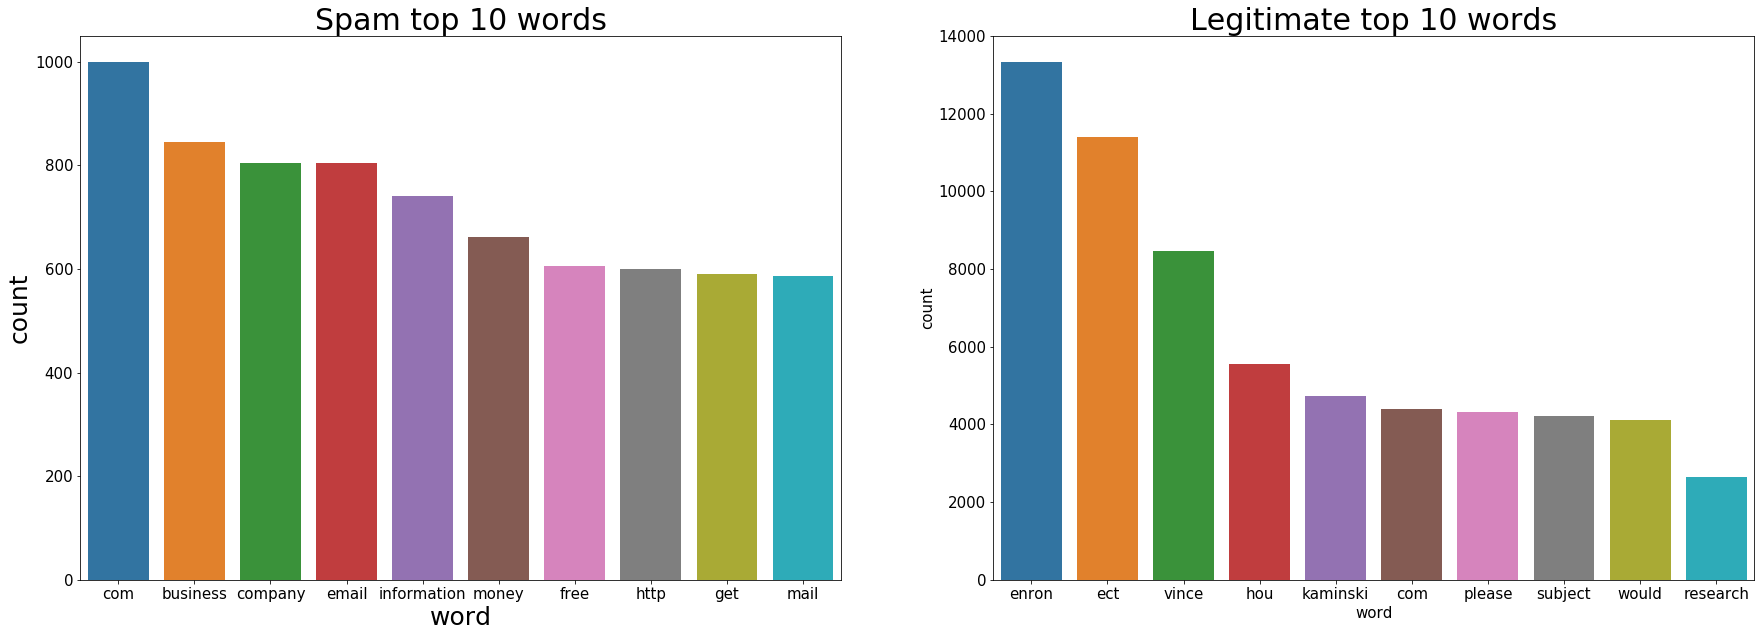

In [40]:
spam_count
fig, (ax,ax1) = plt.subplots(1,2,figsize = (30, 10))
sns.barplot(x = spam_count_df['word'], y = spam_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 25)
ax.set_xlabel('word',fontsize = 25)
ax.tick_params(labelsize=15)
ax.set_title('Spam top 10 words', fontsize = 30)
sns.barplot(x = ham_count_df['word'], y = ham_count_df['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('Legitimate top 10 words', fontsize = 30)

spam_words_str = ' '.join(spam_words)
ham_words_str = ' '.join(ham_words)
spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
ham_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(ham_words_str)